In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model #hacer regresion lineal  ajustar modelo
from sklearn.metrics import mean_squared_error,r2_score# funciones para la evaluacion del modelo
import matplotlib.pyplot as plt
df= pd.read_csv("C:/Users/polla/Desktop/curso python esecencial ciencia de datos/machine learning modelizacion/datos1.csv")

In [5]:
df.head()

,Price,Bathrooms,Bedrooms,ParkingSlots,SquareMeters,GpsLongitude,GpsLatitude,Municipio,Estado
14252,900000.0,1,3,3,120.0,-96.160918,19.177545,Veracruz,Veracruz
11639,6400000.0,2,2,1,140.0,-99.173187,19.409553,Cuauhtémoc,Ciudad de México
15388,8000000.0,4,3,4,1000.0,-102.318128,21.935188,Aguascalientes,Aguascalientes
8111,2800000.0,3,4,2,250.0,-110.411964,24.100680,La Paz,Baja California Sur
15654,850000.0,1,3,1,180.0,-99.118847,23.727906,Ciudad Victoria,Tamaulipas


In [17]:
df=df.dropna(subset=["Price"])
df=df.sample(frac=1).head(10000)
Y=df["Price"]
X=df[["SquareMeters"]] 
#entre las variables mas correlacionadas es capa de obtener un modelo muy predictivo

In [ ]:
df.columns

**varianza  a 1 es mejor el modelo ,
varianza a 0 no es tan explicativo** 

In [18]:
#ajustar modelo 
regr=linear_model.LinearRegression()
regr.fit(X,Y)#que ajuste con  X  Y  Y
print("Coeficientes:",regr.coef_)#VALOR DE LAS BETAS
Y_pred=regr.predict(X) #Generar modelos  predicciones 
print("R Cuadrado",r2_score(Y,Y_pred))#aproximacion de que tan bueno es el modelo
#la varianza es el 23% 

Coeficientes: [10025.97744348]
R Cuadrado 0.2320612384997658


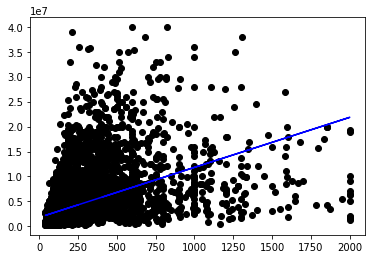

In [19]:
plt.scatter(X[1:10000],Y[1:10000],color ="black")
plt.plot(X[1:10000],Y_pred[1:10000],color="Blue")
plt.show()
# este modelo no es tan bueno para predecir ya que contiene mucha dispersion de puntos

In [20]:
X=df[['Bathrooms','Bedrooms','ParkingSlots','GpsLongitude','GpsLatitude']]
df["Municipio"]=df["Municipio"].apply(str)#convierte a str
df["Estado"]=df["Estado"].apply(str)#convierte a str

dummies=pd.get_dummies(data=df[["Municipio","Estado"]])#convertir el texto a variables dammies lo que hace la variable dammi es comvertir los textos a 1 y 0
X=dummies.add(X,fill_value=0)#agrega las nuevas variables a las dummies que ya se habian agregado 

In [22]:
X.columns

Index(['Bathrooms', 'Bedrooms', 'Estado_Aguascalientes',
       'Estado_Baja California', 'Estado_Baja California Sur',
       'Estado_Buenos Aires', 'Estado_California', 'Estado_Campeche',
       'Estado_Chiapas', 'Estado_Chihuahua',
       ...
       'Municipio_Zempoala', 'Municipio_Zihuatanejo de Azueta',
       'Municipio_Zimatlán de Álvarez', 'Municipio_Zinapécuaro',
       'Municipio_Zozocolco de Hidalgo', 'Municipio_Zumpango', 'Municipio_nan',
       'Municipio_Álvaro Obregón', 'Municipio_Álvaro Obregón Municipality',
       'ParkingSlots'],
      dtype='object', length=389)

In [24]:
#ajustar el modelo  de dummies con 389
regr=linear_model.LinearRegression()
regr.fit(X,Y)
#print("Coeficientes ,"regr.coef_")
Y_pred=regr.predict(X)
print("R Cuadrado:",r2_score(Y,Y_pred))
#tenemos un 54% 

R Cuadrado: 0.5449242097015095


In [27]:
X=X.add(df[["Price"]],fill_value=0) # agrega las columnas de dummies

In [28]:
regr=linear_model.LinearRegression()
regr.fit(X,Y)
#print("coeficientes:",regr.coef_)
Y_pred=regr.predict(X)
print("R cuadrado",r2_score(Y,Y_pred))


R cuadrado 1.0


# nuestro modelo se ajusta a un 100 % es perfecto con la informacion que tenemos podemos predicir un 100 porciento de la varianza 
# de la respuesta 
**lo que se hace aqui es predecir internamente los datos  que se pueden convinar con otros y cambiar el porcentaje de prediccion**